## Exploratory Data Analysis Student Report

* Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Legend
* Medu = Mother's education
* Fedu = Father's education
* Walc = Weekend alcohol consumption
* Dalc = Workday alcohol consumption 
* Goout = Go out with friends
* Famrel = family relation

## Imports

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Reading the data


In [207]:
#reading de csv file
csv_path = "Data/student-por.xls"
df = pd.read_csv(csv_path)

## First look at data

In [208]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [210]:
# first data statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Searching for wrong values


In [211]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [212]:
df.duplicated().sum()

np.int64(0)

## Modeling and grouping the data


In [213]:
#Creating a new column for the total value that is the sum of all grades for better analysis
df_values = df[['G1','G2','G3']]
df['total'] = df_values.sum(axis=1)
#Filtering the data that interest us
df_filtered = df[['traveltime','goout','sex','age','address','Medu','Fedu','traveltime','studytime','famrel','freetime','Dalc','Walc','health','G1','G2','G3','total']]


In [214]:
#Creating the filters for the highest and lowest grades
df_filteredH = df_filtered.sort_values(by='total',ascending=False)
df_filteredH.head()

,traveltime,goout,sex,age,address,Medu,Fedu,traveltime,studytime,famrel,freetime,Dalc,Walc,health,G1,G2,G3,total
338,2,2,F,17,R,3,1,2,4,3,1,1,1,3,18,19,19,56
636,1,4,M,18,U,4,4,1,2,3,2,1,4,2,17,18,19,54
606,2,3,F,17,U,4,2,2,4,4,2,3,1,5,18,18,18,54
332,1,3,F,18,U,2,2,1,3,4,3,1,2,2,18,18,18,54
594,2,5,F,18,U,4,4,2,2,4,3,1,2,1,18,18,18,54


In [215]:
df_filteredL = df_filtered.sort_values(by='total')
df_filteredL.head()

,traveltime,goout,sex,age,address,Medu,Fedu,traveltime,studytime,famrel,freetime,Dalc,Walc,health,G1,G2,G3,total
567,1,1,M,18,R,3,2,1,1,2,3,2,2,5,4,0,0,4
603,1,1,F,18,R,4,2,1,2,5,3,1,1,5,5,0,0,5
605,2,5,F,19,U,1,1,2,1,5,5,2,3,2,5,0,0,5
563,1,1,M,17,U,2,2,1,1,1,2,2,3,5,7,0,0,7
440,2,5,M,16,U,1,1,2,2,5,4,4,5,3,7,0,0,7


## Data Visualization

### Histogram plot

Text(0, 0.5, 'Frequency')

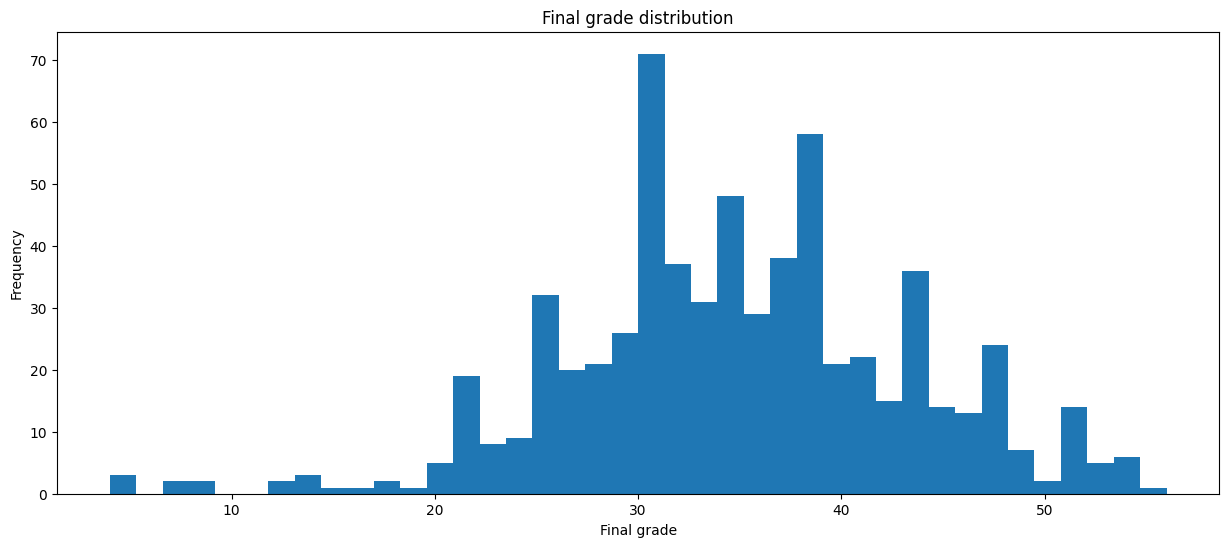

In [216]:
# Histogram plot 
plt.figure(figsize=(15,6))
plt.hist(df['total'],bins=40) #40 bins for better visuaization of data
plt.title('Final grade distribution')
plt.xlabel('Final grade')
plt.ylabel('Frequency')

### Insights:
* In the plot we can see that have an average score between 25 and 45.
* Peak in 30
* The plot is relative symmetrical

#### Correlation plot

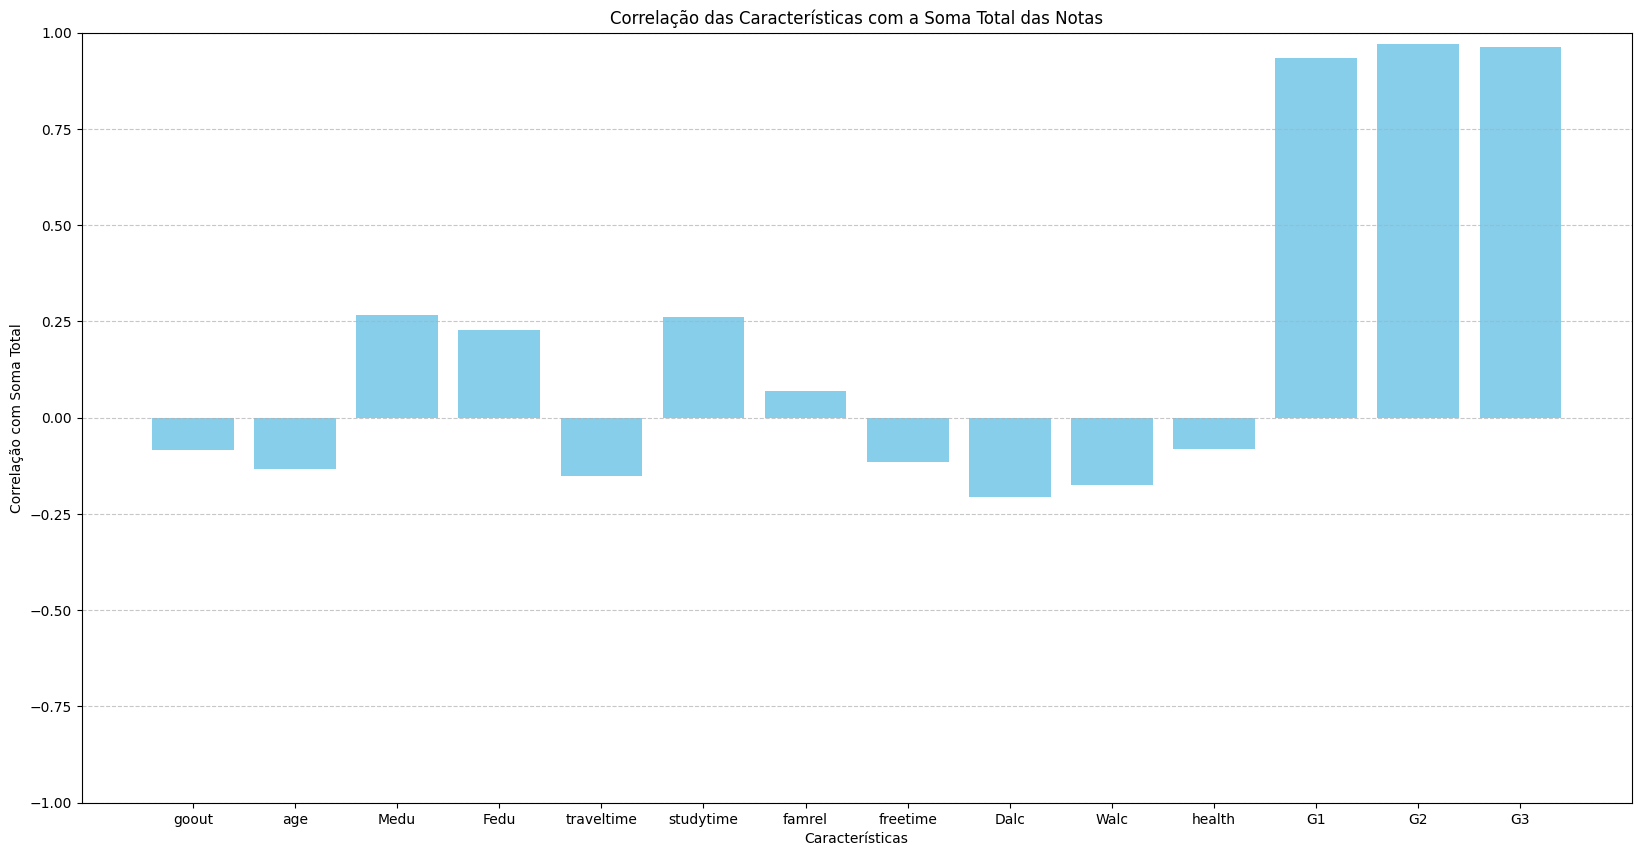

In [217]:


variables = ['goout','age','Medu','Fedu','traveltime','studytime','famrel','freetime','Dalc','Walc','health','G1','G2','G3','total']
corre = df[variables].corr()['total'].drop('total')
plt.figure(figsize=(20, 10))
plt.bar(corre.index, corre.values, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Correlação com Soma Total')
plt.title('Correlação das Características com a Soma Total das Notas')
plt.ylim([-1, 1])  # Ajustar o intervalo dos valores de correlação
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Heat map

<Axes: >

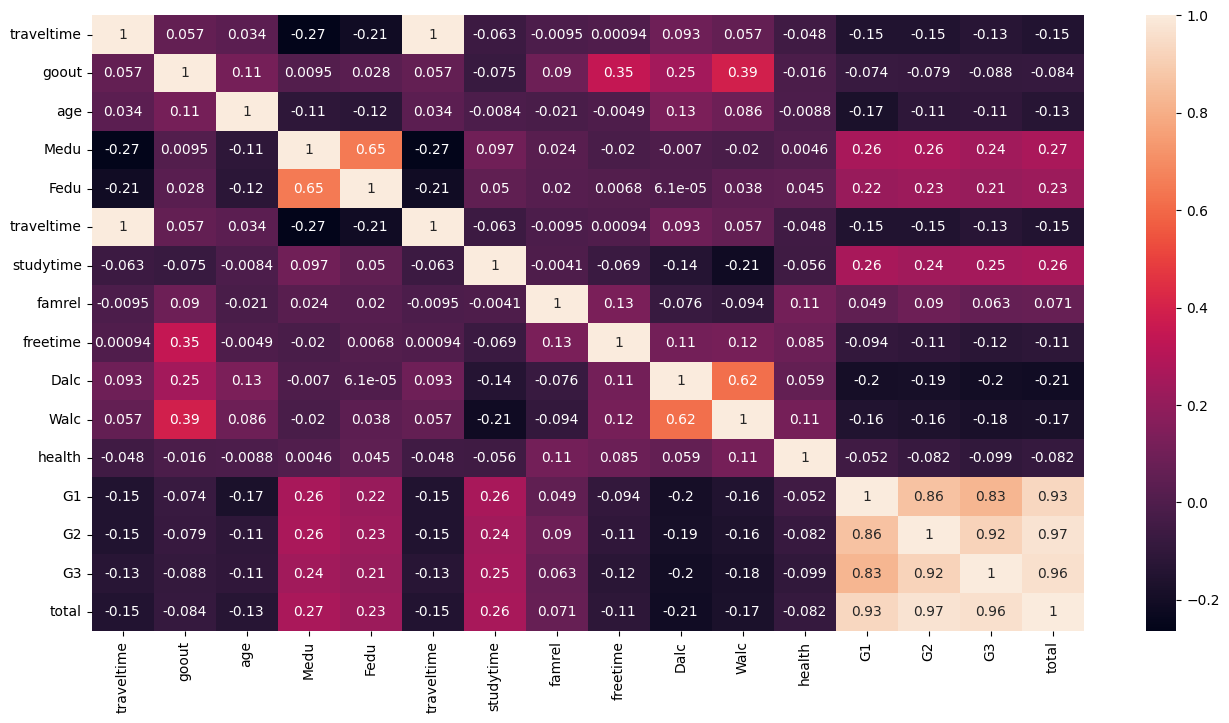

In [225]:
df_filteredI = df_filtered.drop(['sex','address'],axis=1)
plt.figure(figsize=(16,8))
corru = df_filteredI.corr()
sns.heatmap(corru,annot=True)


### Insights:
After all these plots, we see wich are the columns that have more importance for us
* Medu = Mother's education
* Fedu = Father's education
* StudyTime (Self explanatory)

This indicates that the family example and the family in general it's very important!

Surprising mind, the alcohol it's not very important in this case 


## Grouping and comparing the categorical columns

Text(0, 0.5, 'Mean of Final Grade')

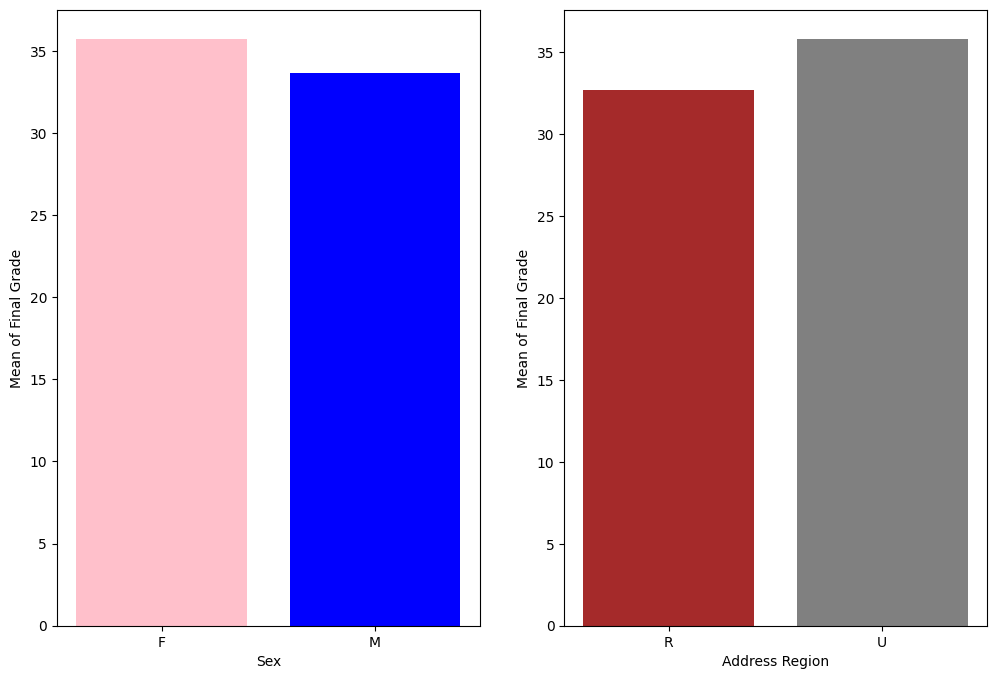

In [226]:
#Grouping by sex and Address region to compare the mean of final grades
df_groupedS = df.groupby('sex')['total'].mean().reset_index()
df_groupedA = df.groupby('address')['total'].mean().reset_index()
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(df_groupedS['sex'],df_groupedS['total'],color=['pink', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Mean of Final Grade')
plt.subplot(1,2,2)
plt.bar(df_groupedA['address'],df_groupedA['total'],color=['brown', 'gray'])
plt.xlabel('Address Region')
plt.ylabel('Mean of Final Grade')



#### All grades comparasion with final grade

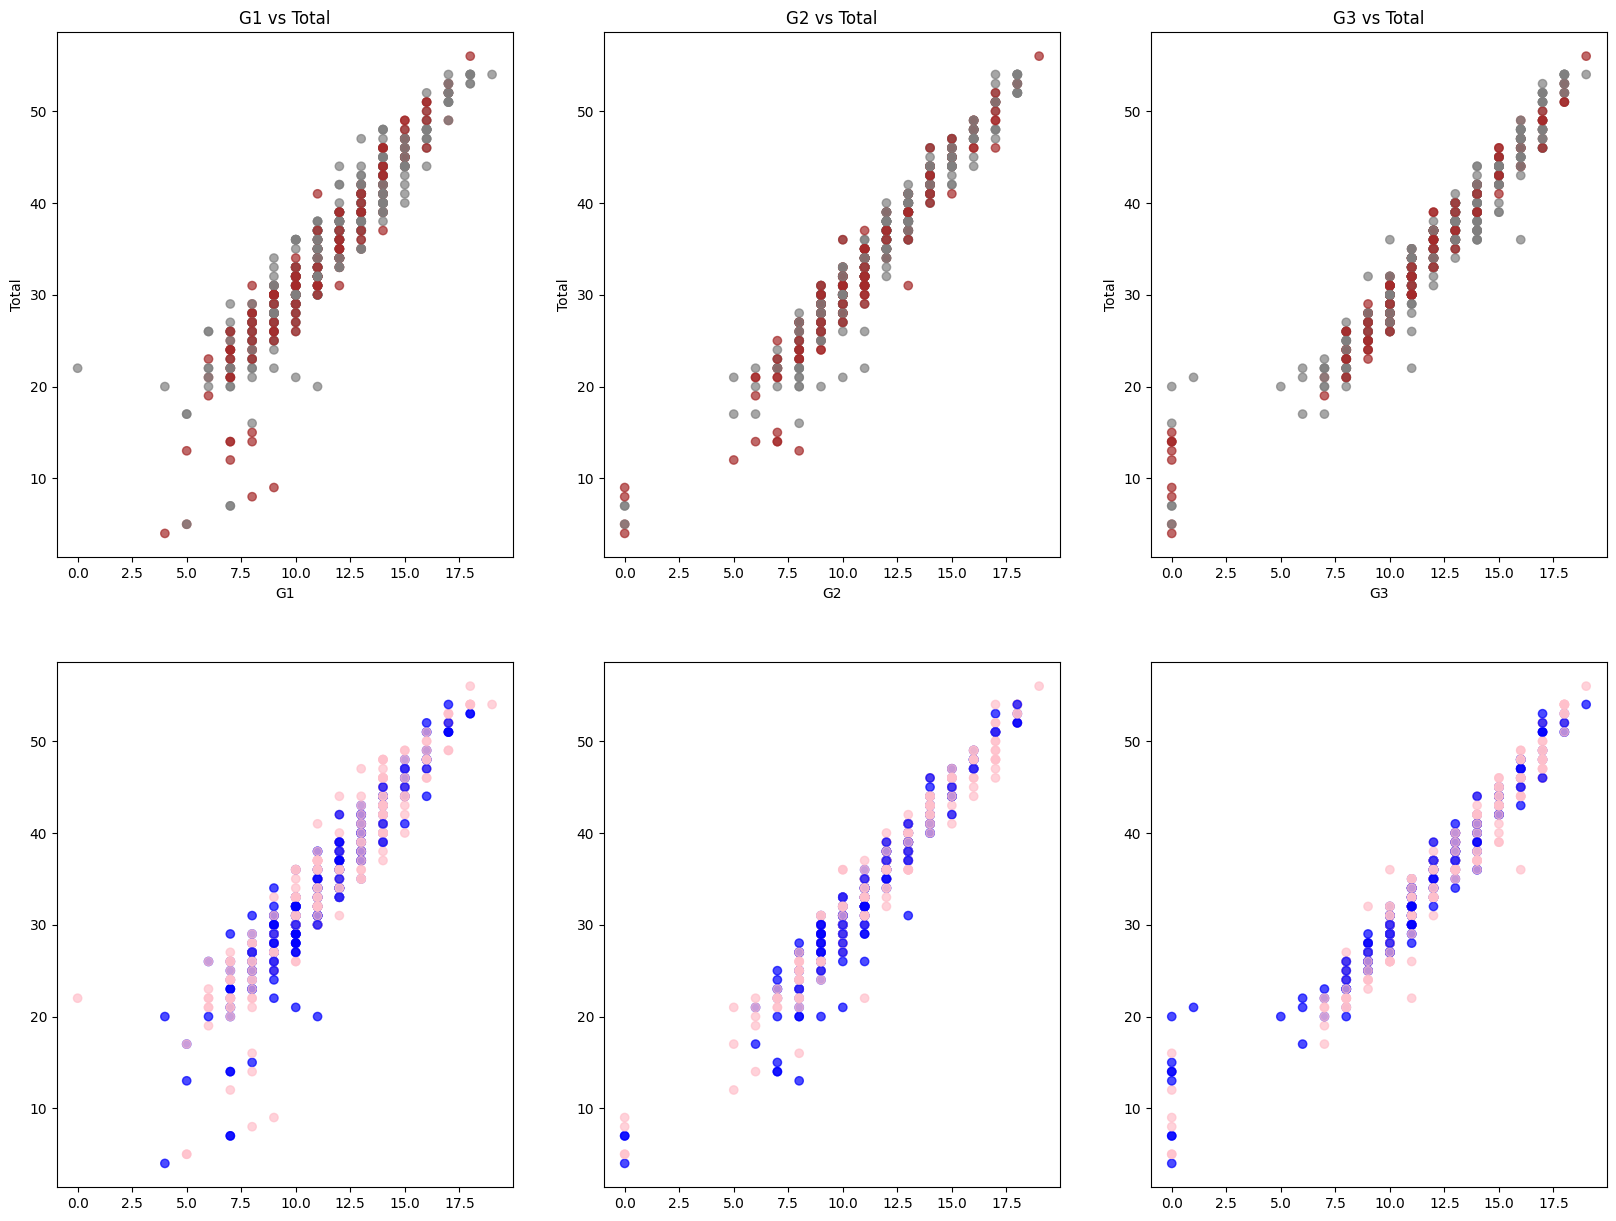

In [220]:
#All grades comparasion with final grade
colors = {'U': 'gray', 'R': 'brown','M': 'blue','F': 'pink'}
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.scatter(df['G1'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G1 vs Total')
plt.xlabel('G1')
plt.ylabel('Total')

plt.subplot(2,3,2)
plt.scatter(df['G2'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G2 vs Total')
plt.xlabel('G2')
plt.ylabel('Total')

plt.subplot(2,3,3)
plt.scatter(df['G3'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G3 vs Total')
plt.xlabel('G3')
plt.ylabel('Total')


plt.subplot(2,3,4)
plt.scatter(df['G1'], df['total'], color=df['sex'].map(colors), alpha=0.7)


plt.subplot(2,3,5)
plt.scatter(df['G2'], df['total'], color=df['sex'].map(colors), alpha=0.7)


plt.subplot(2,3,6)
plt.scatter(df['G3'], df['total'], color=df['sex'].map(colors), alpha=0.7)


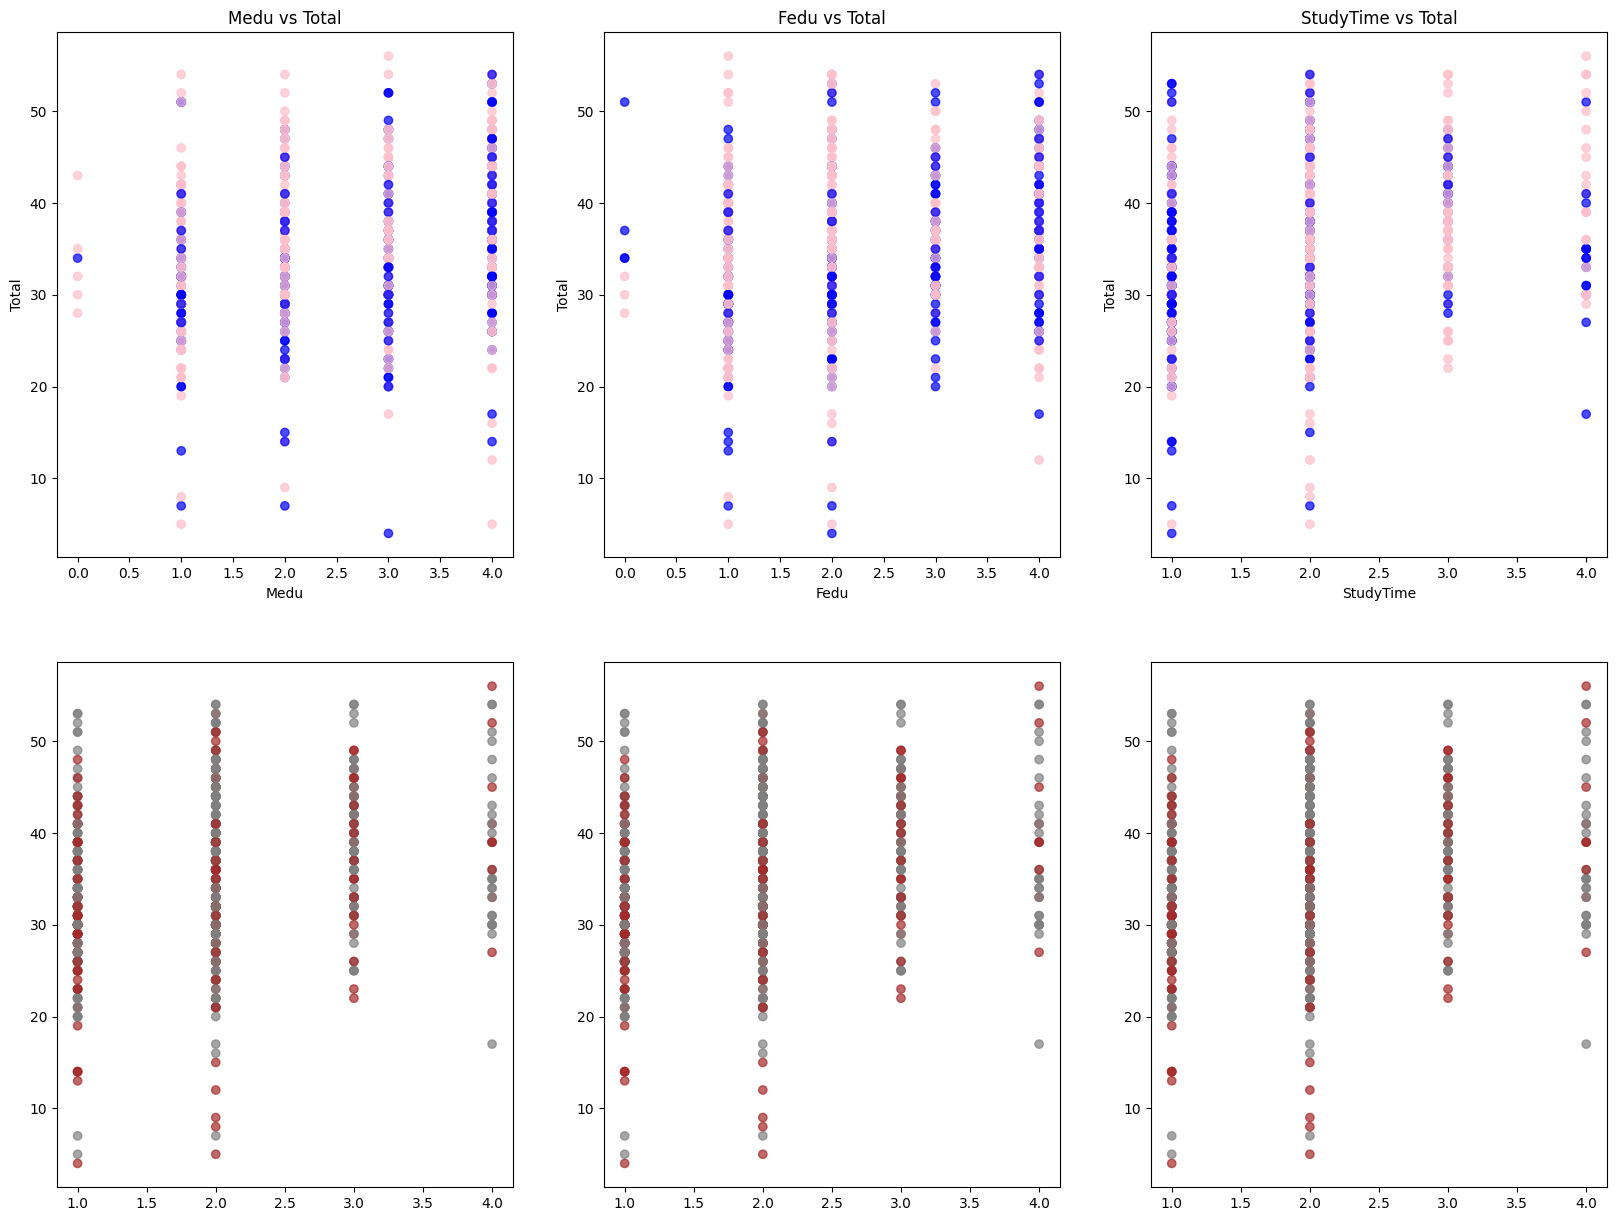

In [221]:
#All grades comparasion with final grade
colorus = {'U': 'gray', 'R': 'brown','M': 'blue','F': 'pink'}
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.scatter(df['Medu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Medu vs Total')
plt.xlabel('Medu')
plt.ylabel('Total')
plt.subplot(2,3,2)
plt.scatter(df['Fedu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Fedu vs Total')
plt.xlabel('Fedu')
plt.ylabel('Total')
plt.subplot(2,3,3)
plt.scatter(df['studytime'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('StudyTime vs Total')
plt.xlabel('StudyTime')
plt.ylabel('Total')
plt.subplot(2,3,4)
plt.scatter(df['studytime'], df['total'], color=df['address'].map(colorus), alpha=0.7)
plt.subplot(2,3,5)
plt.scatter(df['studytime'], df['total'], color=df['address'].map(colorus), alpha=0.7)
plt.subplot(2,3,6)
plt.scatter(df['studytime'], df['total'], color=df['address'].map(colorus), alpha=0.7)

<Axes: xlabel='studytime', ylabel='Count'>

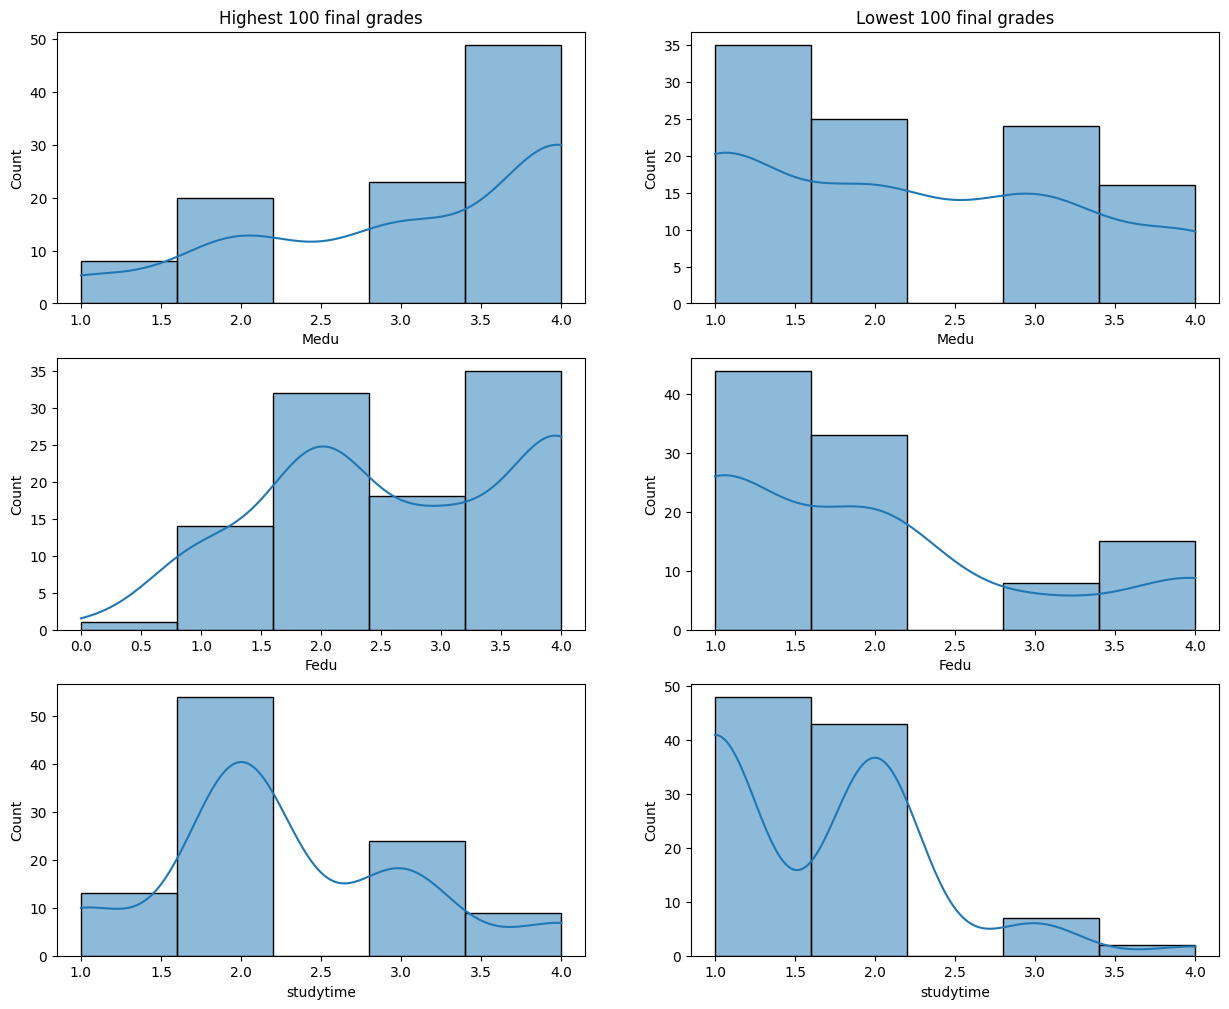

In [222]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.title('Highest 100 final grades')
sns.histplot(df_filteredH.head(100)['Medu'],bins=5,kde=True)
plt.subplot(3,2,2)
plt.title('Lowest 100 final grades')
sns.histplot(df_filteredH.tail(100)['Medu'],bins=5,kde=True)
plt.subplot(3,2,3)
sns.histplot(df_filteredH.head(100)['Fedu'],bins=5,kde=True)
plt.subplot(3,2,4)
sns.histplot(df_filteredH.tail(100)['Fedu'],bins=5,kde=True)
plt.subplot(3,2,5)
sns.histplot(df_filteredH.head(100)['studytime'],bins=5,kde=True)
plt.subplot(3,2,6)
sns.histplot(df_filteredH.tail(100)['studytime'],bins=5,kde=True)
